In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import re

from googletrans import Translator

In [3]:
df_train = pd.read_csv('Data_Train.csv')
df_test = pd.read_csv('Data_Test.csv')

In [4]:
df_train.shape

(78458, 11)

In [5]:
df_train.head()

Unique_ID              Name     Genre Country  \
0     413890         Hardstyle  danceedm      AU   
1     249453        Dj Aladdin  danceedm      AU   
2     681116  Maxximize On Air  danceedm      AU   
3     387253       GR6 EXPLODE    rbsoul      AU   
4    1428029          Tritonal  danceedm      AU   

                                           Song_Name  \
0  N-Vitral presents BOMBSQUAD - Poison Spitter (...   
1          Dj Aladdin - Old School Hip Hop Quick Mix   
2  Maxximize On Air - Mixed by Blasterjaxx - Epis...   
3                MC Yago - Tenho Compromisso (DJ R7)   
4                         Escape (feat. Steph Jones)   

                    Timestamp   Views  Comments  Likes Popularity  Followers  
0  2018-03-30 15:24:45.000000   14017         4    499         97     119563  
1  2016-06-20 05:58:52.000000    1918        17     49         17       2141  
2  2015-05-08 17:45:59.000000    9668        11    312         91      22248  
3  2017-06-08 23:50:03.000000  113036         2  2,400         76     393655  
4  2016-09-17 20:50:19.000000  110024        81  3,031        699     201030

In [6]:
df = pd.concat([df_train,df_test])

In [7]:
df.shape

(98073, 11)

In [8]:
df_test.head()

Unique_ID         Name      Genre Country  \
0     562546   L2Share♫79  all-music      AU   
1     907584  Morgan Page   danceedm      AU   
2     213013  Dirty Workz   danceedm      AU   
3     340312   Gucci Mane  all-music      AU   
4      41854  Angga Kecap       rock      AU   

                                    Song_Name                   Timestamp  \
0               엔플라잉 N.Flying - Rooftop (옥탑방)  2019-01-02 09:49:19.000000   
1      Morgan Page - In The Air - Episode 246  2015-03-09 17:30:10.000000   
2  Outlander - Devotion (Official HQ Preview)  2013-09-18 16:09:03.000000   
3                                 Freaky Gurl  2007-08-14 00:00:00.000000   
4                   Radical Nusantara - Teman  2018-08-10 16:28:54.000000   

   Comments  Likes Popularity  Followers  
0        26  5,428        118       2568  
1        18    738        195     155645  
2        18    386         96      29446  
3         1    388         19     799410  
4         0     79          1          2

In [9]:
df_test.shape

(19615, 10)

In [10]:
df.head()

Comments Country  Followers     Genre  Likes              Name Popularity  \
0         4      AU     119563  danceedm    499         Hardstyle         97   
1        17      AU       2141  danceedm     49        Dj Aladdin         17   
2        11      AU      22248  danceedm    312  Maxximize On Air         91   
3         2      AU     393655    rbsoul  2,400       GR6 EXPLODE         76   
4        81      AU     201030  danceedm  3,031          Tritonal        699   

                                           Song_Name  \
0  N-Vitral presents BOMBSQUAD - Poison Spitter (...   
1          Dj Aladdin - Old School Hip Hop Quick Mix   
2  Maxximize On Air - Mixed by Blasterjaxx - Epis...   
3                MC Yago - Tenho Compromisso (DJ R7)   
4                         Escape (feat. Steph Jones)   

                    Timestamp  Unique_ID     Views  
0  2018-03-30 15:24:45.000000     413890   14017.0  
1  2016-06-20 05:58:52.000000     249453    1918.0  
2  2015-05-08 17:45:59.000000     681116    9668.0  
3  2017-06-08 23:50:03.000000     387253  113036.0  
4  2016-09-17 20:50:19.000000    1428029  110024.0

In [11]:
df.shape

(98073, 11)

In [12]:
df.columns = df.columns.map(str.lower)

In [13]:
df.head()

comments country  followers     genre  likes              name popularity  \
0         4      AU     119563  danceedm    499         Hardstyle         97   
1        17      AU       2141  danceedm     49        Dj Aladdin         17   
2        11      AU      22248  danceedm    312  Maxximize On Air         91   
3         2      AU     393655    rbsoul  2,400       GR6 EXPLODE         76   
4        81      AU     201030  danceedm  3,031          Tritonal        699   

                                           song_name  \
0  N-Vitral presents BOMBSQUAD - Poison Spitter (...   
1          Dj Aladdin - Old School Hip Hop Quick Mix   
2  Maxximize On Air - Mixed by Blasterjaxx - Epis...   
3                MC Yago - Tenho Compromisso (DJ R7)   
4                         Escape (feat. Steph Jones)   

                    timestamp  unique_id     views  
0  2018-03-30 15:24:45.000000     413890   14017.0  
1  2016-06-20 05:58:52.000000     249453    1918.0  
2  2015-05-08 17:45:59.000000     681116    9668.0  
3  2017-06-08 23:50:03.000000     387253  113036.0  
4  2016-09-17 20:50:19.000000    1428029  110024.0

In [14]:
df[df.song_name.isna()]

comments country  followers       genre likes      name popularity  \
31398       540      AU     440088  electronic   705  San Holo        178   

      song_name                   timestamp  unique_id     views  
31398       NaN  2015-01-17 23:57:50.000000    1240617  128906.0

In [15]:
song_name_conter = Counter(df.loc[df.name == 'San Holo'].song_name)

In [16]:
# song_name_conter

In [17]:
song_name = df.loc[df.name == 'San Holo'].song_name.mode()[0]

In [18]:
df[df.song_name.isna()]

comments country  followers       genre likes      name popularity  \
31398       540      AU     440088  electronic   705  San Holo        178   

      song_name                   timestamp  unique_id     views  
31398       NaN  2015-01-17 23:57:50.000000    1240617  128906.0

In [19]:
df.song_name.fillna(song_name,inplace=True)

In [20]:
df.song_name.isna().sum()

0

In [21]:
df.isna().sum()

comments          0
country           0
followers         0
genre             0
likes             0
name              0
popularity        0
song_name         0
timestamp         0
unique_id         0
views         19615
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98073 entries, 0 to 19614
Data columns (total 11 columns):
comments      98073 non-null int64
country       98073 non-null object
followers     98073 non-null int64
genre         98073 non-null object
likes         98073 non-null object
name          98073 non-null object
popularity    98073 non-null object
song_name     98073 non-null object
timestamp     98073 non-null object
unique_id     98073 non-null int64
views         78458 non-null float64
dtypes: float64(1), int64(3), object(7)
memory usage: 9.0+ MB


In [23]:
df.country.unique()

array(['AU'], dtype=object)

In [24]:
df.genre.unique()

array(['danceedm', 'rbsoul', 'all-music', 'trap', 'latin', 'electronic',
       'deephouse', 'hiphoprap', 'classical', 'ambient', 'pop', 'rock',
       'reggaeton', 'country', 'disco', 'alternativerock', 'dubstep',
       'drumbass', 'metal', 'folksingersongwriter', 'indie'], dtype=object)

In [25]:
df.head()

comments country  followers     genre  likes              name popularity  \
0         4      AU     119563  danceedm    499         Hardstyle         97   
1        17      AU       2141  danceedm     49        Dj Aladdin         17   
2        11      AU      22248  danceedm    312  Maxximize On Air         91   
3         2      AU     393655    rbsoul  2,400       GR6 EXPLODE         76   
4        81      AU     201030  danceedm  3,031          Tritonal        699   

                                           song_name  \
0  N-Vitral presents BOMBSQUAD - Poison Spitter (...   
1          Dj Aladdin - Old School Hip Hop Quick Mix   
2  Maxximize On Air - Mixed by Blasterjaxx - Epis...   
3                MC Yago - Tenho Compromisso (DJ R7)   
4                         Escape (feat. Steph Jones)   

                    timestamp  unique_id     views  
0  2018-03-30 15:24:45.000000     413890   14017.0  
1  2016-06-20 05:58:52.000000     249453    1918.0  
2  2015-05-08 17:45:59.000000     681116    9668.0  
3  2017-06-08 23:50:03.000000     387253  113036.0  
4  2016-09-17 20:50:19.000000    1428029  110024.0

In [26]:
name_counter = Counter(df.name)

In [27]:
name_counter

Counter({'Hardstyle': 1422,
         'Dj Aladdin': 30,
         'Maxximize On Air': 193,
         'GR6 EXPLODE': 1747,
         'Tritonal': 342,
         'k$upreme': 60,
         'Diplo': 295,
         'Nick Vanelli': 310,
         'DeejayEcko(PNCS)': 38,
         'TWOLOUD': 125,
         'Revealed Recordings': 550,
         'WB x MB': 140,
         'No Mana': 65,
         'MMNC': 42,
         'Monstercat': 1773,
         'AC Slater': 124,
         'ROJAS': 40,
         'trndmsk': 1040,
         'Aminé': 49,
         'promocionesfreddy': 442,
         'pmrecordings': 90,
         'Cat Dealers': 55,
         'Morgan Page': 602,
         'DJ GUI MARQUES': 110,
         'Angel': 143,
         'Corridos Delux': 257,
         'MrSuicideSheep': 866,
         'Resident Advisor': 997,
         '_lynx1337': 62,
         'MAC AYRES': 35,
         'COLOVE Products': 32,
         'Uprise Music': 219,
         'LEGENDA FUNK': 914,
         'Uptempo HC Channel': 1003,
         'Atlantic Records': 37

In [28]:
df.loc[df.name == 'شعبي ساوند','name'] = 'Popular Sound'

In [29]:
# df.loc[df.song_name.str.contains('مهرجان مستر تعبان مهرجانات تيم حريف شعبى'),'name'] = 'Mister Taaban Festival festivals Tim Charif popular'


In [30]:
df.loc[df.name == 'Popular Sound'].song_name.unique()

array(['الحوت الحقيقى ديس على اليوتيوبرز - رد على ديس محمد خالد - عمرو سايكو Amr Saiko',
       "Oka Wi Ortega.Lo3't El 3ioon اوكا واورتيجا . لغة العيون",
       'مزمارالقناصه بطلعات شديدة اوى 2019 للعالمي محمد اوشه حظ شعبي 2019',
       'مهرجان مستر تعبان مهرجانات تيم حريف شعبى 2019',
       'مهرجان اللى بيشتكى مننا - الصواريخ دقدق و فانكى - ELY BYSHTKY MENNA El Sawareekh 2019',
       'مهرجان بت ومشيت بمزاجها بندق - حوده ناصر - تيتو - توني مهرجانات 2019',
       'مهرجان الطيبة جريمة حمو بيكا الجديد 2019 مودي امين توزيع باسل السوهاجي',
       'مهرجان هنشلف عليكم غناء حمو بيكا وميسره توزيع يوسف الجن ريمكس',
       'مهرجان تيك توك غناء و توزيع الهامي روميو',
       'مهرجان على بيه مظهر -مانو الدبابه - توزيع الخضرى - مهرجانات 2019',
       'محمد مزيكا 2019 موال نسيت العذاب',
       'Magdy Shata - Mahadesh Fina No.1 مجدي شطه - محدش فينا نمبرون - مجدي شطه',
       'مهرجان جوزنى بنتك ياعم الحج - حمو بيكا - على قدوره توزيع فيجو الدخلاوى',
       'مهرجان بابا المجال و بجداره مهرجانات 2019 غنا

In [31]:
# df.loc[df.song_name.str.contains('مزمارالقناصه بطلعات شديدة اوى 2019 للعالمي محمد اوشه حظ شعبي'),'name'] = 'Sniper rifle with strong ambitions, 2019, for the world footballer Mohammed Oshh, popular luck'
# df.loc[df.song_name == 'مهرجان مستر تعبان مهرجانات تيم حريف شعبى','name'] = 'Mister Taaban Festival festivals Tim Charif popular'
# df.loc[df.song_name == 'مهرجان بت ومشيت بمزاجها بندق - حوده ناصر - تيتو - توني مهرجانات','name'] = 'Bit Festival and I walked with her mood Hazel - Hoda Nasser - Tito - Tony Festivals'
# df.loc[df.song_name == 'مهرجان الطيبة جريمة حمو بيكا الجديد 2019 مودي امين توزيع باسل السوهاجي','name'] = 'The Good Festivals Festival, Hamo Beca New 2019 Modi Moderator, Basil Al-Suhagy'
# df.loc[df.song_name == 'مهرجان هنشلف عليكم غناء حمو بيكا وميسره توزيع يوسف الجن ريمكس','name'] = 'We will celebrate the singing of Hamu Beca and his facilitator. The distribution of Youssef El Jin Remix'
# df.loc[df.song_name == 'مهرجان تيك توك غناء و توزيع الهامي روميو','name'] = 'The Tic Tac Festival is a rhyming vocals and vocals'
# df.loc[df.song_name.str.contains('مهرجان على بيه مظهر -مانو الدبابه - توزيع الخضرى - مهرجانات'),'name'] = 'Ali Bey Mazhar Festival - Manu Al-Dabbabah - Al-Khudari Distribution - Festivals'
# df.loc[df.song_name == 'محمد مزيكا 2019 موال نسيت العذاب','name'] = 'Mohamed Mazzika 2019 Mawal forgot the agony'
# df.loc[df.song_name == 'مهرجان جوزنى بنتك ياعم الحج - حمو بيكا - على قدوره توزيع فيجو الدخلاوى','name'] = 'The Jawzni Bentek Festival in Hajj - Hamou Beca - is due to its ability to distribute Figo Dakhlawi'
# df.loc[df.song_name == 'مهرجان بابا المجال و بجداره مهرجانات 2019 غناء علاء فيفتى - عنبة - دوبى توزيع مولوتوف','name'] = 'Baba Al-Majal Festival and with its wall festivals'
# df.loc[df.song_name.str.contains('مهرجانات 2019 مهرجان الـ 10 نصايح 2019 شواحه - حلقولو توزيع زيزو المايسترو'),'name'] = 'Festivals 2019 The 10 Tips Festival 2019 Shwah - Chalkulu, the distribution of the Zizo Maestro'

# df.loc[df.name == '','name'] = 'My people sound'
# df.loc[df.name == '','name'] = 'My people sound'







In [32]:
# df.loc[df.song_name.str.contains('مهرجان بت ومشيت بمزاجها بندق - حوده ناصر - تيتو - توني مهرجانات'),'name'] = 'Bit Festival and I walked with her mood Hazel - Hoda Nasser - Tito - Tony Festivals'

In [33]:
df.loc[df.name.str.contains('ميوزك مهرجانات'),'name'] = 'Music festivals'
df.loc[df.name == '仙水風楽','name'] = 'Sensui Kazeraku'

In [34]:
df.loc[df.name.str.contains('Music Mhragnat')]

Empty DataFrame
Columns: [comments, country, followers, genre, likes, name, popularity, song_name, timestamp, unique_id, views]
Index: []

In [35]:
df.loc[df.name == 'Sensui Kazeraku'].song_name.unique()

array(['Last Battle -asellus-', 'Nの城', '夢の跡地', '嵐に舞う黒い影 /クシャルダオラ',
       '栄光への戦い', 'VS.マルク', '戦火を交えて', '決戦！N', '炎国の王妃 /テオ・テスカトル & ナナ・テスカトリ',
       '不死身の敵に挑む', 'アンパンマンのマーチ ラスボス風アレンジ', 'リュウラセンの塔', '死の塔',
       '戦闘！ソルガレオ ルナアーラ ネクロズマ', 'ハイリンク', '戦闘！スイクン', '戦闘！チャンピオン（下北沢）',
       'デデドン(絶望)', 'J - E-N - O-V - A', '数式に囚われた者', 'ビッグブリッヂの死闘',
       'おどるポンポコリン ラスボス風アレンジ'], dtype=object)

In [36]:
translator = Translator()

In [37]:
def googleTranslate(text_value):
    text_value = text_value.strip()
    words = translator.translate(text_value ,dest='en')
    return words.text
    

In [38]:
df.loc[df.name == 'Sensui Kazeraku']

comments country  followers      genre likes             name  \
8217          0      AU        125  all-music     3  Sensui Kazeraku   
17798         0      AU        125  all-music     2  Sensui Kazeraku   
19460         0      AU        125  all-music     3  Sensui Kazeraku   
24699         0      AU        125  all-music     7  Sensui Kazeraku   
28325         0      AU        125  all-music     6  Sensui Kazeraku   
29142         0      AU        125  all-music     8  Sensui Kazeraku   
32732         1      AU        125  all-music     5  Sensui Kazeraku   
40883         0      AU        125  all-music     9  Sensui Kazeraku   
41960         0      AU        125  all-music     6  Sensui Kazeraku   
43206         0      AU        125  all-music     2  Sensui Kazeraku   
44526         3      AU        125  all-music   449  Sensui Kazeraku   
47825         0      AU        125  all-music     7  Sensui Kazeraku   
49935         0      AU        125  all-music     5  Sensui Kazeraku   
53747         0      AU        125  all-music     6  Sensui Kazeraku   
56343         0      AU        125  all-music     2  Sensui Kazeraku   
59623         0      AU        125  all-music     3  Sensui Kazeraku   
66741         0      AU        125  all-music     7  Sensui Kazeraku   
73623         0      AU        125  all-music    12  Sensui Kazeraku   
74597         0      AU        125  all-music     5  Sensui Kazeraku   
75545         0      AU        125  all-music     4  Sensui Kazeraku   
6271          0      AU        125  all-music     5  Sensui Kazeraku   
15435         1      AU        125  all-music    35  Sensui Kazeraku   

      popularity                   song_name                   timestamp  \
8217           0       Last Battle -asellus-  2018-06-09 07:35:03.000000   
17798          0                         Nの城  2018-06-10 13:03:56.000000   
19460          1                        夢の跡地  2018-06-25 10:04:19.000000   
24699          0            嵐に舞う黒い影 /クシャルダオラ  2018-06-08 13:54:41.000000   
28325          0                      栄光への戦い  2018-07-06 08:53:05.000000   
29142          1                      VS.マルク  2018-08-11 07:26:04.000000   
32732          1                      戦火を交えて  2018-07-25 06:31:35.000000   
40883          0                        決戦！N  2018-06-14 12:26:37.000000   
41960          0  炎国の王妃 /テオ・テスカトル & ナナ・テスカトリ  2018-06-15 09:33:34.000000   
43206          0                    不死身の敵に挑む  2018-07-16 01:04:39.000000   
44526         30        アンパンマンのマーチ ラスボス風アレンジ  2018-10-10 17:02:39.000000   
47825          1                    リュウラセンの塔  2018-06-09 02:47:41.000000   
49935          0                         死の塔  2018-07-23 12:52:44.000000   
53747          1        戦闘！ソルガレオ ルナアーラ ネクロズマ  2018-08-08 14:45:38.000000   
56343          0                       ハイリンク  2018-07-24 03:53:35.000000   
59623          0                     戦闘！スイクン  2018-07-03 07:41:07.000000   
66741          0              戦闘！チャンピオン（下北沢）  2018-06-14 07:41:45.000000   
73623          0                    デデドン(絶望)  2018-06-04 22:10:31.000000   
74597          0           J - E-N - O-V - A  2018-07-22 12:16:46.000000   
75545          0                    数式に囚われた者  2018-07-03 09:25:52.000000   
6271           0                  ビッグブリッヂの死闘  2018-06-10 03:56:02.000000   
15435          3         おどるポンポコリン ラスボス風アレンジ  2018-10-16 04:30:41.000000   

       unique_id    views  
8217     1561748    244.0  
17798    1561746    783.0  
19460    1561742    276.0  
24699    1561750    344.0  
28325    1561739    246.0  
29142    1561732    822.0  
32732    1561734    505.0  
40883    1561744    449.0  
41960    1561743    367.0  
43206    1561738    373.0  
44526    1561731  93302.0  
47825    1561749    451.0  
49935    1561736    394.0  
53747    1561733    427.0  
56343    1561735    182.0  
59623    1561741    995.0  
66741    1561745    394.0  
73623    1561751    835.0  
74597    1561737    314.0  
75545    1561740    267.0  
6271     1561

In [39]:
df.loc[df.name == 'Sensui Kazeraku','song_name'] = df.loc[df.name == 'Sensui Kazeraku'].song_name.apply(googleTranslate)

In [40]:
df.loc[df.name == 'Popular Sound','song_name'] = df.loc[df.name == 'Popular Sound'].song_name.apply(googleTranslate)

In [41]:
df.loc[df.name == 'Music festivals']

comments country  followers      genre  likes             name  \
4860          2      AU       8932  all-music  4,380  Music festivals   
4929          6      AU       8932  all-music  7,734  Music festivals   
6462          2      AU       8932  all-music    260  Music festivals   
6780          5      AU       8932  all-music  1,782  Music festivals   
9640          0      AU       8932  all-music  1,131  Music festivals   
10939         0      AU       8932  all-music  1,714  Music festivals   
18047         4      AU       8932  all-music  1,075  Music festivals   
20761        10      AU       8932  all-music  12.6K  Music festivals   
22393         3      AU       8932  all-music  1,148  Music festivals   
27333         3      AU       8932  all-music  1,753  Music festivals   
28224         1      AU       8932  all-music    273  Music festivals   
33697         0      AU       8932  all-music    174  Music festivals   
33707         0      AU       8932  all-music    353  Music festivals   
34219         0      AU       8932  all-music  1,419  Music festivals   
37986         8      AU       8932  all-music  3,740  Music festivals   
39425         0      AU       8932  all-music  1,035  Music festivals   
45601        10      AU       8932  all-music  16.1K  Music festivals   
49738         2      AU       8932  all-music  2,672  Music festivals   
54499         6      AU       8932  all-music  14.1K  Music festivals   
57249         6      AU       8932  all-music  1,133  Music festivals   
57459         6      AU       8932  all-music  10.7K  Music festivals   
62681         1      AU       8932  all-music  4,324  Music festivals   
65841         0      AU       8932  all-music    972  Music festivals   
66165         0      AU       8932  all-music    415  Music festivals   
2166          0      AU       8932  all-music  1,617  Music festivals   
2169          0      AU       8932  all-music  2,821  Music festivals   
5014          2      AU       8932  all-music  3,022  Music festivals   
6213          1      AU       8932  all-music    617  Music festivals   
6719          2      AU       8932  all-music  1,223  Music festivals   
7234          0      AU       8932  all-music    208  Music festivals   
9404          7      AU       8932  all-music  8,594  Music festivals   

      popularity                                          song_name  \
4860          66  اجدد مهرجانات اوكا&اورتيجا 2019 - مهرجان لغة ا...   
4929         146  مهرجان حقي عاش حمو بيكا - مودى امين - توزيع في...   
6462           5  المهرجان اللى هيجيب تراند فى يوم - مهرجان دنيا...   
6780          56  El Joker Ft. Sam - Enfsam 7ad Part 2 L احمد ال...   
9640          17  مهرجان جوزني بنتك يا عم الحج علي قدورة - حمو ب...   
10939         25  الدخلاوية - مهرجان قصف جبهة - فيلو - شاعر الغن...   
18047         24  مهرجان - حظي قليل - حمو بيكا - على قدورة - مود...   
20761        163  2019اجدد مهرجانات المدفعجية 2019 - مهرجان هاتو...   
22393         12  اجدد مهرجانات فريق الاحلام - مهرجان الكدابين ك...   
27333         32  مهرجان عيون الشر - بيكا & مودي امين & نور التو...   
28224          9  اغنية حزينة جدا 2019 اغنية حبك كدب مصطفى جابر ...   
33697          2  مهرجان هافانا - المافيا تيم - انتاج شركة طلبت ...   
33707         11   El Joker - Fora2 Salonat L الجوكر - فراق صالونات   
34219         20  مهرجان الاصدقاء السداسية الجزء الثالث +18 فريق...   
37986         96  مهرجانات 2019 - مهرجان عمو يا كابتن - السادات ...   
39425         21  مهرجان اخطر بوابة | حمو بيكا - ميسرة - نور الت...   
45601        247    مهرجان شبل و حملة - فريق الاحلام الدخلاوية 2018   
49738         48  مهرجان عنبر الصحاب فرحه عصفوره - الباور العالى...   
54499        151  مهرجانات 2019 " مات المفتري " 2019 ( يابني انا...   
57249         28  لكل محبي لعبة PUBG اسمع اغنية ببجي - غناء #فيج...   
57459        231  مهرجان الظالم والمظلوم الجزء التانى حمو بيكا l...   
62681         53  مهرجان - العيله المالكه - حمو بيكا - مودي امين...   
65841         11  Oli Tab Oka Wi Orte

In [42]:
# df.loc[df.name == 'Music festivals','song_name'] = df.loc[df.name == 'Music festivals'].song_name.apply(googleTranslate)

In [43]:
# df.drop(df.loc[df.name == 'Music festivals'])

In [44]:
df = df[~df.name.str.contains('Music festivals')] # Here i am dropping the the music festivals

In [45]:
df.head()

comments country  followers     genre  likes              name popularity  \
0         4      AU     119563  danceedm    499         Hardstyle         97   
1        17      AU       2141  danceedm     49        Dj Aladdin         17   
2        11      AU      22248  danceedm    312  Maxximize On Air         91   
3         2      AU     393655    rbsoul  2,400       GR6 EXPLODE         76   
4        81      AU     201030  danceedm  3,031          Tritonal        699   

                                           song_name  \
0  N-Vitral presents BOMBSQUAD - Poison Spitter (...   
1          Dj Aladdin - Old School Hip Hop Quick Mix   
2  Maxximize On Air - Mixed by Blasterjaxx - Epis...   
3                MC Yago - Tenho Compromisso (DJ R7)   
4                         Escape (feat. Steph Jones)   

                    timestamp  unique_id     views  
0  2018-03-30 15:24:45.000000     413890   14017.0  
1  2016-06-20 05:58:52.000000     249453    1918.0  
2  2015-05-08 17:45:59.000000     681116    9668.0  
3  2017-06-08 23:50:03.000000     387253  113036.0  
4  2016-09-17 20:50:19.000000    1428029  110024.0

In [46]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'[^\w]', ' ', text)
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

In [47]:
df['song_name'] = df.song_name.apply(clean_text)

In [48]:
df.song_name

0        vitral presents bombsquad poison spitter snake...
1                     aladdin old school hip hop quick mix
2                  maxximize air mixed blasterjaxx episode
3                                   yago tenho compromisso
4                                  escape feat steph jones
                               ...                        
19610                               jordan burns your mind
19611         sjammienators system overload komplex rumble
19612       vermont paradigma wassermann krautramatrik mix
19613                          yheti metapod ominous combo
19614                               devin wild everlasting
Name: song_name, Length: 98042, dtype: object

In [49]:
song_counter = Counter(df.song_name)

In [50]:
song_counter

Counter({'vitral presents bombsquad poison spitter snakepit anthem': 1,
         'aladdin old school hip hop quick mix': 1,
         'maxximize air mixed blasterjaxx episode': 37,
         'yago tenho compromisso': 1,
         'escape feat steph jones': 1,
         'started off finessen prod oscar': 1,
         'coone universal language cyber remix': 1,
         'pick your poison feat kay figure remix': 1,
         '': 763,
         'chihuahua mixdown instagram': 1,
         'big bang radio episode podcast': 33,
         'olly james loax feat christina pasion love again out now': 1,
         'bang hands out now smashed beatz': 1,
         'mana anti social media': 1,
         'timekeeperz distance world illusion': 1,
         'joakim karud rock angel': 1,
         'memtrix blind light': 1,
         'rogue from the dust': 1,
         'big sean last slater remix': 1,
         'icy narco pollari ice prod rojas adam the track': 1,
         'kid simius planet the simius': 1,
         'said 

In [51]:
df.loc[df.song_name == '']

comments country  followers       genre  likes          name  \
8             0      AU       1892        trap     28  Nick Vanelli   
219          14      AU    2165852  electronic  1,296         Flume   
246           0      AU       1892        trap     28  Nick Vanelli   
371           0      AU       1892        trap     20  Nick Vanelli   
1048          0      AU         10         pop      1       Raul RM   
...         ...     ...        ...         ...    ...           ...   
18983         1      AU        103   all-music    288    Ahmed Emad   
19026       639      AU    1758040   all-music  91.1K           BTS   
19113        52      AU       7919   all-music   113K       Sherine   
19364        20      AU    1177595   all-music    17K   Kodak Black   
19389         6      AU       1729         pop    448     hongkhanh   

      popularity song_name                   timestamp  unique_id     views  
8              7            2018-11-29 22:37:07.000000     967409    1263.0  
219          156            2016-11-25 00:00:00.000000     349035  127655.0  
246            7            2017-06-08 10:38:02.000000     967500    1645.0  
371            7            2017-04-18 09:26:11.000000     967521    1691.0  
1048           0            2018-06-07 22:38:52.000000    1140605      21.0  
...          ...       ...                         ...        ...       ...  
18983          5            2019-01-02 17:19:18.000000          8       NaN  
19026      3,691            2016-08-15 15:04:12.000000      86593       NaN  
19113      1,314            2018-10-27 11:51:57.000000    1263910       NaN  
19364      1,062            2014-12-25 20:20:38.000000     532926       NaN  
19389         25            2018-11-05 14:47:43.000000     449411       NaN  

[763 rows x 11 columns]

In [52]:
df.song_name = df.song_name.replace('',np.nan)

In [53]:
df[df.song_name.isna()]

comments country  followers       genre  likes          name  \
8             0      AU       1892        trap     28  Nick Vanelli   
219          14      AU    2165852  electronic  1,296         Flume   
246           0      AU       1892        trap     28  Nick Vanelli   
371           0      AU       1892        trap     20  Nick Vanelli   
1048          0      AU         10         pop      1       Raul RM   
...         ...     ...        ...         ...    ...           ...   
18983         1      AU        103   all-music    288    Ahmed Emad   
19026       639      AU    1758040   all-music  91.1K           BTS   
19113        52      AU       7919   all-music   113K       Sherine   
19364        20      AU    1177595   all-music    17K   Kodak Black   
19389         6      AU       1729         pop    448     hongkhanh   

      popularity song_name                   timestamp  unique_id     views  
8              7       NaN  2018-11-29 22:37:07.000000     967409    1263.0  
219          156       NaN  2016-11-25 00:00:00.000000     349035  127655.0  
246            7       NaN  2017-06-08 10:38:02.000000     967500    1645.0  
371            7       NaN  2017-04-18 09:26:11.000000     967521    1691.0  
1048           0       NaN  2018-06-07 22:38:52.000000    1140605      21.0  
...          ...       ...                         ...        ...       ...  
18983          5       NaN  2019-01-02 17:19:18.000000          8       NaN  
19026      3,691       NaN  2016-08-15 15:04:12.000000      86593       NaN  
19113      1,314       NaN  2018-10-27 11:51:57.000000    1263910       NaN  
19364      1,062       NaN  2014-12-25 20:20:38.000000     532926       NaN  
19389         25       NaN  2018-11-05 14:47:43.000000     449411       NaN  

[763 rows x 11 columns]

In [54]:
df['song_name_num_words'] = df.song_name.apply(lambda a: len(str(a).split()))

In [55]:
df['song_name_unique_words'] = df.song_name.apply(lambda b : len(set(str(b).split())))

In [56]:
df['song_name_charac_words'] = df.song_name.apply(lambda c: len(str(c)))

In [57]:
df['song_name_mean_word_len'] = df.song_name.apply(lambda h : np.mean([len(a) for a in str(h).split()]))

In [58]:
df.dropna(subset=['song_name'],axis=0,inplace=True)

In [59]:
df[df.song_name.isna()]

Empty DataFrame
Columns: [comments, country, followers, genre, likes, name, popularity, song_name, timestamp, unique_id, views, song_name_num_words, song_name_unique_words, song_name_charac_words, song_name_mean_word_len]
Index: []

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97279 entries, 0 to 19614
Data columns (total 15 columns):
comments                   97279 non-null int64
country                    97279 non-null object
followers                  97279 non-null int64
genre                      97279 non-null object
likes                      97279 non-null object
name                       97279 non-null object
popularity                 97279 non-null object
song_name                  97279 non-null object
timestamp                  97279 non-null object
unique_id                  97279 non-null int64
views                      77832 non-null float64
song_name_num_words        97279 non-null int64
song_name_unique_words     97279 non-null int64
song_name_charac_words     97279 non-null int64
song_name_mean_word_len    97279 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 11.9+ MB


In [61]:
df['popularity'] = df.popularity.str.replace(',','')

In [62]:
df.head(10)

comments country  followers      genre  likes              name  \
0          4      AU     119563   danceedm    499         Hardstyle   
1         17      AU       2141   danceedm     49        Dj Aladdin   
2         11      AU      22248   danceedm    312  Maxximize On Air   
3          2      AU     393655     rbsoul  2,400       GR6 EXPLODE   
4         81      AU     201030   danceedm  3,031          Tritonal   
5          6      AU      71038  all-music  4,500          k$upreme   
6         15      AU     119563   danceedm  1,017         Hardstyle   
7          5      AU    7120051   danceedm     88             Diplo   
9          0      AU       2835      latin    622  DeejayEcko(PNCS)   
10        23      AU      60805   danceedm    397           TWOLOUD   

   popularity                                          song_name  \
0          97  vitral presents bombsquad poison spitter snake...   
1          17               aladdin old school hip hop quick mix   
2          91            maxximize air mixed blasterjaxx episode   
3          76                             yago tenho compromisso   
4         699                            escape feat steph jones   
5         325                    started off finessen prod oscar   
6         226               coone universal language cyber remix   
7          12             pick your poison feat kay figure remix   
9          47                        chihuahua mixdown instagram   
10        124                     big bang radio episode podcast   

                     timestamp  unique_id     views  song_name_num_words  \
0   2018-03-30 15:24:45.000000     413890   14017.0                    7   
1   2016-06-20 05:58:52.000000     249453    1918.0                    7   
2   2015-05-08 17:45:59.000000     681116    9668.0                    5   
3   2017-06-08 23:50:03.000000     387253  113036.0                    3   
4   2016-09-17 20:50:19.000000    1428029  110024.0                    4   
5   2017-11-27 14:55:11.000000       2839  223716.0                    5   
6   2016-01-22 17:23:26.000000     414871   37480.0                    5   
7   2012-01-17 00:00:00.000000     209496    4022.0                    7   
9   2017-09-28 04:07:47.000000     171948   27874.0                    3   
10  2014-09-29 10:29:11.000000    1457484   14411.0                    5   

    song_name_unique_words  song_name_charac_words  song_name_mean_word_len  
0                        7                      56                 7.142857  
1                        7                      36                 4.285714  
2                        5                      39                 7.000000  
3                        3                      22                 6.666667  
4                        4                      23                 5.000000  
5                        5                      31                 5.400000  
6                        5                      36                 6.400000  
7                        7                      38                 4.571429  
9                        3                      27                 8.333333  
10                       5                      30                 5.200000

In [63]:
def clean_popularity(text):
    text = text.lower()
#     text = re.sub(r'[^\w]', '',text)
    if '.' in text and 'k' in text:
        text = text.replace('k','00')
    elif 'k' in text:
        text = text.replace('k','000')
    return text

In [64]:
df.popularity = df.popularity.apply(clean_popularity)

In [65]:
df.popularity

0         97
1         17
2         91
3         76
4        699
        ... 
19610    341
19611    305
19612     12
19613    666
19614    141
Name: popularity, Length: 97279, dtype: object

In [66]:
popular_count = Counter([a for a in df.popularity])
popular_count

Counter({'97': 188,
         '17': 543,
         '91': 196,
         '76': 241,
         '699': 23,
         '325': 40,
         '226': 64,
         '12': 724,
         '47': 332,
         '124': 125,
         '753': 17,
         '0': 7982,
         '64': 279,
         '179': 74,
         '78': 222,
         '453': 33,
         '3463': 5,
         '35': 363,
         '600': 23,
         '352': 45,
         '14': 633,
         '1': 3142,
         '6687': 1,
         '205': 91,
         '457': 35,
         '61': 273,
         '1453': 6,
         '148': 119,
         '417': 31,
         '3': 1684,
         '1118': 9,
         '42': 309,
         '37': 366,
         '9': 858,
         '4183': 2,
         '7': 1119,
         '28': 395,
         '8': 948,
         '13.100': 11,
         '2': 2116,
         '4262': 2,
         '228': 65,
         '2464': 2,
         '11': 767,
         '539': 23,
         '1878': 5,
         '29': 418,
         '59': 301,
         '447': 26,
         '935': 9

In [67]:
df.popularity = df.popularity.apply(lambda x : x.replace('.',''))

In [68]:
dff = df

In [69]:
dff.likes = dff.likes.apply(clean_popularity) # Here the value is clean and some value like 109000 is pending

In [70]:
df['popularity'] = df.popularity.astype('object').astype('int')

In [71]:
df.likes = df.likes.apply(lambda x : x.replace(',','')) 

In [72]:
df.likes = df.likes.apply(lambda x : x.replace('.',''))

In [73]:
df.loc[df.likes.str.contains('m')]

comments country  followers       genre likes                    name  \
3067       7545      AU    1474721      rbsoul   12m              TopDawgEnt   
4277       8091      AU    1177595   all-music  126m             Kodak Black   
4628       6072      AU     947100      rbsoul  137m            brysontiller   
7032       4421      AU      57078       latin  133m       RD Urbans Music ✅   
7810       9844      AU    1458205   all-music  188m            Travis Scott   
8895      35399      AU     274586   all-music  261m         LifeOfDesiigner   
10868     16989      AU     113667   all-music  102m                 16yrold   
18713     45082      AU    4900250         pop  174m              johnlegend   
19003      5969      AU     206858   all-music  124m            Tee Grizzley   
19170      7419      AU     148143         pop  116m           HIGH ON MUSIC   
20586      7127      AU     490047   all-music  116m                PnB Rock   
21638      8667      AU    1177595   all-music  118m             Kodak Black   
23280     12393      AU     460718    danceedm  168m                ILLENIUM   
23496     10586      AU    1898325   all-music  146m            LIL UZI VERT   
24730      8494      AU    1889441   all-music   11m           Martin Garrix   
24914     10756      AU     835611   all-music  154m  A BOOGIE WIT DA HOODIE   
33251     22109      AU    1306969   all-music  166m                Lil Pump   
33288     11159      AU     198880   hiphoprap  126m                   Aminé   
37019     11957      AU    1454540     ambient  105m                    Kygo   
39809     20513      AU    3347626   all-music  145m            XXXTENTACION   
40204      3820      AU    9789123   all-music  115m                  Future   
40305      6869      AU     564916   all-music  111m            FettyWap1738   
41444     21139      AU    1329383   all-music  186m             Post Malone   
42136     17984      AU     669650   all-music  106m                 6IX9INE   
42421     10691      AU    1177595   all-music  146m             Kodak Black   
42774      7836      AU     431122   all-music  103m            Rich The Kid   
43846      8138      AU     366608   all-music  115m                 Cardi B   
44788     21501      AU     356207   all-music  119m                Lil Baby   
45606     12718      AU     669650   all-music  119m                 6IX9INE   
46141     26791      AU      60435   all-music  178m                   ROJAS   
46306     12813      AU     822796   all-music   11m              Juice WRLD   
52065     23321      AU    3347626   all-music  118m            XXXTENTACION   
52653      6837      AU    1274169      rbsoul  157m                partyomo   
52686      2587      AU    9789123   all-music  102m                  Future   
54821      4371      AU    1329383   all-music  107m             Post Malone   
56274     20851      AU    1898325   all-music  209m            LIL UZI VERT   
57912     23370      AU    2389940   all-music  222m         octobersveryown   
62835     13506      AU    3347626   all-music    1m            XXXTENTACION   
66695     11018      AU     924277   all-music  133m               21 Savage   
69330     20188      AU    4204142    danceedm  277m  Major Lazer [OFFICIAL]   
70405      6481      AU    2389940   all-music  135m         octobersveryown   
71326     28792      AU     822796   all-music  179m              Juice WRLD   
74739      5150      AU    1274169      rbsoul  101m                partyomo   
76926      2147      AU     131535   all-music    1m           Adham Seliman   
3433       4952      AU    2165852  electronic  103m                   Flume   
4582      11611      AU     170696   all-music  107m               Young M.A   
5935      13869      AU    1898325   all-music  165m            LIL UZI VERT   
7477      12897      AU     924277   all-music  161m               21 Savage   
10764      4351      AU    9789123   all-music  113m                  Future   
11579  

In [74]:
df.likes = df.likes.apply(lambda x : x.replace('m','000000'))

In [75]:
df.loc[df.unique_id == 413890]

comments country  followers     genre likes       name  popularity  \
0         4      AU     119563  danceedm   499  Hardstyle          97   

                                           song_name  \
0  vitral presents bombsquad poison spitter snake...   

                    timestamp  unique_id    views  song_name_num_words  \
0  2018-03-30 15:24:45.000000     413890  14017.0                    7   

   song_name_unique_words  song_name_charac_words  song_name_mean_word_len  
0                       7                      56                 7.142857

In [76]:
df.head()

comments country  followers     genre likes              name  popularity  \
0         4      AU     119563  danceedm   499         Hardstyle          97   
1        17      AU       2141  danceedm    49        Dj Aladdin          17   
2        11      AU      22248  danceedm   312  Maxximize On Air          91   
3         2      AU     393655    rbsoul  2400       GR6 EXPLODE          76   
4        81      AU     201030  danceedm  3031          Tritonal         699   

                                           song_name  \
0  vitral presents bombsquad poison spitter snake...   
1               aladdin old school hip hop quick mix   
2            maxximize air mixed blasterjaxx episode   
3                             yago tenho compromisso   
4                            escape feat steph jones   

                    timestamp  unique_id     views  song_name_num_words  \
0  2018-03-30 15:24:45.000000     413890   14017.0                    7   
1  2016-06-20 05:58:52.000000     249453    1918.0                    7   
2  2015-05-08 17:45:59.000000     681116    9668.0                    5   
3  2017-06-08 23:50:03.000000     387253  113036.0                    3   
4  2016-09-17 20:50:19.000000    1428029  110024.0                    4   

   song_name_unique_words  song_name_charac_words  song_name_mean_word_len  
0                       7                      56                 7.142857  
1                       7                      36                 4.285714  
2                       5                      39                 7.000000  
3                       3                      22                 6.666667  
4                       4                      23                 5.000000

In [77]:
df.genre.unique()

array(['danceedm', 'rbsoul', 'all-music', 'latin', 'electronic',
       'deephouse', 'hiphoprap', 'classical', 'ambient', 'pop', 'trap',
       'rock', 'reggaeton', 'country', 'disco', 'alternativerock',
       'dubstep', 'drumbass', 'metal', 'folksingersongwriter', 'indie'],
      dtype=object)

In [78]:
df.loc[df.genre == 'rbsoul']

comments country  followers   genre  likes            name  popularity  \
3             2      AU     393655  rbsoul   2400     GR6 EXPLODE          76   
26           70      AU      47883  rbsoul   7383  DJ GUI MARQUES         457   
36            2      AU     183420  rbsoul    789    LEGENDA FUNK          42   
50            3      AU     393655  rbsoul    264     GR6 EXPLODE          11   
61            2      AU     183420  rbsoul   6863    LEGENDA FUNK         134   
...         ...     ...        ...     ...    ...             ...         ...   
19574        25      AU       1418  rbsoul  11300       Treybaile         208   
19580         1      AU     183420  rbsoul   3500    LEGENDA FUNK          89   
19584        11      AU     131670  rbsoul    119           DJ R7          25   
19607         1      AU     393655  rbsoul    610     GR6 EXPLODE          27   
19608        26      AU      75814  rbsoul   4738      NO1 | NOAH         231   

                                               song_name  \
3                                 yago tenho compromisso   
26                                        mega gui deluc   
36     bruna famosa senta senta talib danflin maax de...   
50                                  jholoko bumbum pedro   
61     mcs jhowzinho kadinho lel quica tipo anitta ch...   
...                                                  ...   
19574                        ann marie loyalty feat vedo   
19580  cretinos ent vai sentando rebolando talento im...   
19584                    montagem doidisse jogadinha djr   
19607        mingau joga rabeta pra nois helbert martins   
19608                                            ice out   

                        timestamp  unique_id     views  song_name_num_words  \
3      2017-06-08 23:50:03.000000     387253  113036.0                    3   
26     2018-09-25 21:46:56.000000     257221  276204.0                    3   
36     2018-09-04 17:58:50.000000     574188   33892.0                   10   
50     2018-11-19 15:08:47.000000     385925   11086.0                    3   
61     2018-03-03 18:52:10.000000     574290  336124.0                   11   
...                           ...        ...       ...                  ...   
19574  2018-04-13 05:00:47.000000    1459212       NaN                    5   
19580  2018-02-28 01:43:27.000000     574291       NaN                    7   
19584  2014-03-03 19:15:52.000000      14475       NaN                    4   
19607  2017-12-12 17:10:27.000000     386716       NaN                    7   
19608  2018-05-18 01:30:02.000000     982417       NaN                    2   

       song_name_unique_words  song_name_charac_words  song_name_mean_word_len  
3                           3                      22                 6.666667  
26                          3                      14                 4.000000  
36                          9                      63                 5.400000  
50                          3                      20                 6.000000  
61                         11                      71                 5.545455  
...                       ...                     ...                      ...  
19574                       5                      27                 4.600000  
19580                       7                      52                 6.571429  
19584                       4                      31                 7.000000  
19607                       7                      43                 5.285714  
19608                       2                       7                 3.000000  

[6782 rows x 15 columns]

In [79]:
df.name.value_counts()

Mixmag            2598
Monstercat        1773
GR6 EXPLODE       1747
Hardstyle         1422
Sweet Musique     1229
                  ... 
YK Osiris            1
Tora Loaadiing       1
Thuy Ngoc Le         1
SERPENTS             1
KENNIE               1
Name: name, Length: 1212, dtype: int64

In [80]:
genre_num_col = df.genre.str.get_dummies()

In [81]:
df.name = df.name.apply(clean_text)

In [82]:
name_num_col = df.name.str.get_dummies()

In [83]:
name_num_col.head()

aash mehta  ace aura  acid pauli  adam amin  add kim  adham seliman  \
0           0         0           0          0        0              0   
1           0         0           0          0        0              0   
2           0         0           0          0        0              0   
3           0         0           0          0        0              0   
4           0         0           0          0        0              0   

   adictos los corridos  adik  adriatique cercle  adventure club  ...  \
0                     0     0                  0               0  ...   
1                     0     0                  0               0  ...   
2                     0     0                  0               0  ...   
3                     0     0                  0               0  ...   
4                     0     0                  0               0  ...   

   yvng jalape  zaddyb  zcbeats  zedd  zimmer  zinay hernandez  \
0            0       0        0     0       0                0   
1            0       0        0     0       0                0   
2            0       0        0     0       0                0   
3            0       0        0     0       0                0   
4            0       0        0     0       0                0   

   zorillio tribalerio zorra mix  zpk  zubair dubai  zzz beats  
0                              0    0             0          0  
1                              0    0             0          0  
2                              0    0             0          0  
3                              0    0             0          0  
4                              0    0             0          0  

[5 rows x 1157 columns]

In [84]:
df.head()

comments country  followers     genre likes           name  popularity  \
0         4      AU     119563  danceedm   499      hardstyle          97   
1        17      AU       2141  danceedm    49        aladdin          17   
2        11      AU      22248  danceedm   312  maxximize air          91   
3         2      AU     393655    rbsoul  2400        explode          76   
4        81      AU     201030  danceedm  3031       tritonal         699   

                                           song_name  \
0  vitral presents bombsquad poison spitter snake...   
1               aladdin old school hip hop quick mix   
2            maxximize air mixed blasterjaxx episode   
3                             yago tenho compromisso   
4                            escape feat steph jones   

                    timestamp  unique_id     views  song_name_num_words  \
0  2018-03-30 15:24:45.000000     413890   14017.0                    7   
1  2016-06-20 05:58:52.000000     249453    1918.0                    7   
2  2015-05-08 17:45:59.000000     681116    9668.0                    5   
3  2017-06-08 23:50:03.000000     387253  113036.0                    3   
4  2016-09-17 20:50:19.000000    1428029  110024.0                    4   

   song_name_unique_words  song_name_charac_words  song_name_mean_word_len  
0                       7                      56                 7.142857  
1                       7                      36                 4.285714  
2                       5                      39                 7.000000  
3                       3                      22                 6.666667  
4                       4                      23                 5.000000

In [85]:
train_data_preprocessed = df.drop(['country','song_name','timestamp','unique_id'],axis='columns')


In [86]:
train_data_preprocessed = df.drop(['genre'],axis='columns')

In [87]:
train_data_preprocessed = df.drop(['name','song_name','timestamp','genre','country','unique_id'],axis=1)

In [88]:
dff = pd.concat([train_data_preprocessed,genre_num_col,name_num_col],axis=1)

In [89]:
dff.shape

(97279, 1187)

In [90]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97279 entries, 0 to 19614
Columns: 1187 entries, comments to zzz beats
dtypes: float64(2), int64(1184), object(1)
memory usage: 881.7+ MB


In [91]:
train_data_preprocessed = dff[dff['views'].notna()]

In [92]:
train_data_preprocessed.shape

(77832, 1187)

In [93]:
test_data_preprocessed = dff[dff['views'].isna()]

In [94]:
test_data_preprocessed.shape

(19447, 1187)

In [95]:
train_data_preprocessed.astype('object').astype('int')

comments  followers  likes  popularity   views  song_name_num_words  \
0             4     119563    499          97   14017                    7   
1            17       2141     49          17    1918                    7   
2            11      22248    312          91    9668                    5   
3             2     393655   2400          76  113036                    3   
4            81     201030   3031         699  110024                    4   
...         ...        ...    ...         ...     ...                  ...   
78453        19     143726    489          47   12221                    2   
78454         4     211419    292         100    8265                    4   
78455         1    1403057    157          31    3621                    3   
78456        24     143743    371          89    8896                    4   
78457         4      89084   1829          71  102487                    2   

       song_name_unique_words  song_name_charac_words  \
0                           7                      56   
1                           7                      36   
2                           5                      39   
3                           3                      22   
4                           4                      23   
...                       ...                     ...   
78453                       2                      13   
78454                       4                      27   
78455                       3                      23   
78456                       4                      20   
78457                       2                      16   

       song_name_mean_word_len  all-music  ...  yvng jalape  zaddyb  zcbeats  \
0                            7          0  ...            0       0        0   
1                            4          0  ...            0       0        0   
2                            7          0  ...            0       0        0   
3                            6          0  ...            0       0        0   
4                            5          0  ...            0       0        0   
...                        ...        ...  ...          ...     ...      ...   
78453                        6          0  ...            0       0        0   
78454                        6          0  ...            0       0        0   
78455                        7          0  ...            0       0        0   
78456                        4          0  ...            0       0        0   
78457                        7          1  ...            0       0        0   

       zedd  zimmer  zinay hernandez  zorillio tribalerio zorra mix  zpk  \
0         0       0                0                              0    0   
1         0       0                0                              0    0   
2         0       0                0                              0    0   
3         0       0                0                              0    0   
4         0       0                0                              0    0   
...     ...     ...              ...                            ...  ...   
78453     0       0                0                              0    0   
78454     0       0                0                              0    0   
78455     0       0                0                              0    0   
78456     0       0                0                              0    0   
78457     0       0                0                              0    0   

       zubair dubai  zzz beats  
0                 0          0  
1                 0          0  
2                 0          0  
3                 0          0  
4                 0          0  
...             ...        ...  
78453             0          0  
78454             0          0  
78455             0          0  
78456             0          0  
78457             0          0  

[77832 rows x 1187 columns]

In [97]:
test_data_preprocessed['likes'] = test_data_preprocessed['likes'].astype('object').astype('int')

In [98]:
test_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19447 entries, 0 to 19614
Columns: 1187 entries, comments to zzz beats
dtypes: float64(2), int64(1185)
memory usage: 176.3 MB


In [99]:
X = train_data_preprocessed.drop(['views'],axis=1)

In [100]:
X.shape

(77832, 1186)

In [101]:
Y = train_data_preprocessed['views']

In [102]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state = 8)

In [103]:
linear = LinearRegression()
linear.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
linear.coef_

array([ 9.42690455e+02,  1.15155510e+00,  3.09484349e-01, ...,
       -3.79387213e+04,  2.53037639e+05,  1.83691747e+06])

In [105]:
pd.DataFrame(linear.coef_,train_x.columns).plot(kind = "bar")

In [106]:
train_predict = linear.predict(train_x)

In [107]:
test_predict = linear.predict(test_x)

In [108]:
np.sqrt(mean_squared_error(train_predict,train_y))

1653320.9708018308

In [109]:
np.sqrt(mean_squared_error(test_predict,test_y))

262948253.4566941

In [111]:
def model_fit(model, train_train_X, train_test_X, train_train_y, train_test_y, 
              train_X, train_y, test_X, filename ):
    model.fit(train_train_X,train_train_y)

    pd.DataFrame(model.coef_,train_train_X.columns).plot(kind = "bar")

    train_predict = model.predict(train_train_X)

    test_predict = model.predict(train_test_X)

    print("Train RMSE : ",np.sqrt(mean_squared_error(train_predict,train_train_y)))

    print("Test RMSE : ",np.sqrt(mean_squared_error(test_predict,train_test_y)))
    
#     model.fit(train_X, train_y)
    
#     test_hack_predict = model.predict(test_X.drop(columns=['name','song_name','timestamp','genre','country','unique_id']))
    
#     test_pred_df = pd.DataFrame(test_hack_predict,columns= ["Item_Outlet_Sales"])
#     result = pd.concat([test_X[["Item_Identifier", "Outlet_Identifier"]],test_pred_df] ,axis = 1)
#     result.to_csv(filename,index = False)

In [115]:
lass = Lasso(alpha=0.3, normalize=True)
model_fit(lass,train_x,test_x,train_y,test_y,X,Y,test_data_preprocessed,"lasso_solution.csv")

Train RMSE :  1653283.1499368288
Test RMSE :  1476257.2165565232


In [117]:
ridge = Ridge(alpha=0.3, normalize=True)
model_fit(ridge,train_x,test_x,train_y,test_y,X,Y,test_data_preprocessed,"ridge_solution.csv")

Train RMSE :  1732784.0837602876
Test RMSE :  1585977.3690397795


Train RMSE :  3800002.8009031136
Test RMSE :  4110962.648152927


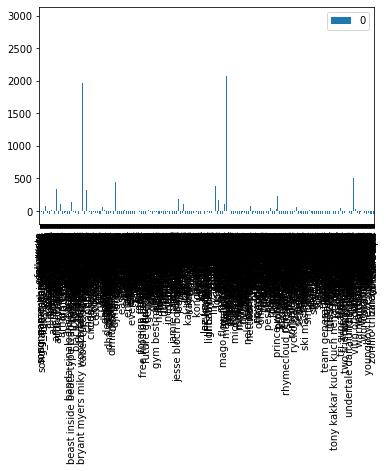

In [116]:
elastic = ElasticNet(alpha=0.3, l1_ratio=0.3, normalize=True)
model_fit(elastic,train_x,test_x,train_y,test_y,X,Y,test_data_preprocessed,"ridge_solution.csv")

In [196]:
dff.head()

comments  followers likes  popularity     views  song_name_num_words  \
0         4     119563   499          97   14017.0                    7   
1        17       2141    49          17    1918.0                    7   
2        11      22248   312          91    9668.0                    5   
3         2     393655  2400          76  113036.0                    3   
4        81     201030  3031         699  110024.0                    4   

   song_name_unique_words  song_name_charac_words  song_name_mean_word_len  \
0                       7                      56                 7.142857   
1                       7                      36                 4.285714   
2                       5                      39                 7.000000   
3                       3                      22                 6.666667   
4                       4                      23                 5.000000   

   all-music  ...  yvng jalape  zaddyb  zcbeats  zedd  zimmer  \
0          0  ...            0       0        0     0       0   
1          0  ...            0       0        0     0       0   
2          0  ...            0       0        0     0       0   
3          0  ...            0       0        0     0       0   
4          0  ...            0       0        0     0       0   

   zinay hernandez  zorillio tribalerio zorra mix  zpk  zubair dubai  \
0                0                              0    0             0   
1                0                              0    0             0   
2                0                              0    0             0   
3                0                              0    0             0   
4                0                              0    0             0   

   zzz beats  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 1187 columns]

In [161]:
df.head()

comments country  followers     genre likes              name  popularity  \
0         4      AU     119563  danceedm   499         Hardstyle          97   
1        17      AU       2141  danceedm    49        Dj Aladdin          17   
2        11      AU      22248  danceedm   312  Maxximize On Air          91   
3         2      AU     393655    rbsoul  2400       GR6 EXPLODE          76   
4        81      AU     201030  danceedm  3031          Tritonal         699   

                                           song_name  \
0  vitral presents bombsquad poison spitter snake...   
1               aladdin old school hip hop quick mix   
2            maxximize air mixed blasterjaxx episode   
3                             yago tenho compromisso   
4                            escape feat steph jones   

                    timestamp  unique_id     views  song_name_num_words  \
0  2018-03-30 15:24:45.000000     413890   14017.0                    7   
1  2016-06-20 05:58:52.000000     249453    1918.0                    7   
2  2015-05-08 17:45:59.000000     681116    9668.0                    5   
3  2017-06-08 23:50:03.000000     387253  113036.0                    3   
4  2016-09-17 20:50:19.000000    1428029  110024.0                    4   

   song_name_unique_words  song_name_charac_words  song_name_mean_word_len  
0                       7                      56                 7.142857  
1                       7                      36                 4.285714  
2                       5                      39                 7.000000  
3                       3                      22                 6.666667  
4                       4                      23                 5.000000

In [82]:
df = df.name.str.get_dummies()

AttributeError: 'DataFrame' object has no attribute 'name'

In [199]:
df['likes'] = df.likes.astype('object').astype('int')

In [ ]:
df[]

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97279 entries, 0 to 19614
Data columns (total 15 columns):
comments                   97279 non-null int64
country                    97279 non-null object
followers                  97279 non-null int64
genre                      97279 non-null object
likes                      97279 non-null int64
name                       97279 non-null object
popularity                 97279 non-null int64
song_name                  97279 non-null object
timestamp                  97279 non-null object
unique_id                  97279 non-null int64
views                      77832 non-null float64
song_name_num_words        97279 non-null int64
song_name_unique_words     97279 non-null int64
song_name_charac_words     97279 non-null int64
song_name_mean_word_len    97279 non-null float64
dtypes: float64(2), int64(8), object(5)
memory usage: 11.9+ MB


In [348]:
df.shape

(98073, 0)

In [340]:
word = translator.translate('El Joker Ft. Sam - Enfsam 7ad Part 2 L احمد ال',dest='en')
word.text

'El Joker Ft. Sam - Enfsam 7ad Part 2 L Ahmed Al'

In [270]:
df.name.

Mixmag               2598
Monstercat           1773
GR6 EXPLODE          1747
Hardstyle            1422
Sweet Musique        1229
                     ... 
Jhay Cortez             1
Slow Hours              1
Adriatique-Cercle       1
@marcusbasquiat         1
vromance                1
Name: name, Length: 1219, dtype: int64